# PCA (Principal Components Analysis) on Olivetti Faces

Hello everyone and Prof. Di Bo Ya, my name is Denzel Elden Wijaya, and in this notebook I will showcase you the effect of doing **Dimensional Reduction** on the Performance of **K-means Clustering** and **DBScan** on the **Olivette Faces Datasets**. In this notebook, I will try to tune the parameters, so we will know the advantages and disadvantages of doing Dimensional Reduction on Face Recognition.

The process will include these steps:
1. Import the Datasets from `sklearn.datasets`
2. Dimension Reduction using PCA (`dim = 50`)
3. `K-Means` and `DBSCAN` applications + Visualizations
4. Parameter Tuning (Repeat Step 2,3,4)
4. Analysis, Result, and Conclusions

### 1. Import Datasets from `sklearn.datasets`

In [1]:
from sklearn.datasets._olivetti_faces import fetch_olivetti_faces

dataset = fetch_olivetti_faces()
print(dataset.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [2]:
X = dataset.data
print(f"Original shape: {X.shape}")

Original shape: (400, 4096)


In [3]:
images = dataset.images
print(images.shape)
print(images)

(400, 64, 64)
[[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
  [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
  [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
  ...
  [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
  [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
  [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]

 [[0.45454547 0.47107437 0.5123967  ... 0.19008264 0.18595041 0.18595041]
  [0.446281   0.48347107 0.5206612  ... 0.21487603 0.2107438  0.2107438 ]
  [0.49586776 0.5165289  0.53305787 ... 0.20247933 0.20661157 0.20661157]
  ...
  [0.77272725 0.78099173 0.7933884  ... 0.1446281  0.1446281  0.1446281 ]
  [0.77272725 0.7768595  0.7892562  ... 0.13636364 0.13636364 0.13636364]
  [0.7644628  0.7892562  0.78099173 ... 0.15289256 0.15289256 0.15289256]]

 [[0.3181818  0.40082645 0.49173555 ... 0.40082645 0.3553719  0.30991736]
  [0.309

In [4]:
import numpy as np

isnull = np.isnan(images).sum()
print(f"Number of NaNs: {isnull}")

Number of NaNs: 0


So, we have imported the dataset from `sklearn` and then we also checked that no null value inside the datasets. So, after this we can directly go to the next step which is the dimensional reduction using PCA.

### 2. Dimensional Reduction using PCA (dim = 50)

For the initial dimension reduction, we will do with reduction form 4096 to 50 first, then we will apply the K-Means Clustering and DBSCAN without any tuning to see the result. After that let's see the effect of parameter tuning on the prrformance of the Algorithm.

In [5]:
from sklearn.decomposition import PCA

pca_50 = PCA(n_components=50, random_state = 42)
X_pca_50 = pca_50.fit_transform(X)

print(f"Number of components: {pca_50.n_components_}")

Number of components: 50


### 3. K-Means and DBSCAN Application + Visualization

Here, I am going to compare the performance of K-Means and DBSCAN with some different numbers of dimension. Let's define the function to evaluate the performance of K-Means Clustering and DBSCAN by evaluating its Silhouette Score and Davies-Bouldin Score.

Davies-Bouldin Score is an internal evaluation metric that measures the average similarity between each cluster and its most similar one. A lower score indicates better clustering, as it reflects compact and well-separated clusters.

In [6]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

kmeans_initial = KMeans(n_clusters=30, random_state=42)
kmeans_labels_initial = kmeans_initial.fit_predict(X_pca_50)

dbscan_initial = DBSCAN(eps=3, min_samples=5)
dbscan_labels_initial = dbscan_initial.fit_predict(X_pca_50)

print("Silhouette score (KMeans):", silhouette_score(X_pca_50, kmeans_labels_initial))
print("Davies-Bouldin score (KMeans):", davies_bouldin_score(X_pca_50, kmeans_labels_initial))
print("Silhouette score (DBSCAN):", silhouette_score(X_pca_50, dbscan_labels_initial))
print("Davies-Bouldin score (DBSCAN):", davies_bouldin_score(X_pca_50, dbscan_labels_initial))

Silhouette score (KMeans): 0.1803444
Davies-Bouldin score (KMeans): 1.613739194787143
Silhouette score (DBSCAN): -0.19304714
Davies-Bouldin score (DBSCAN): 2.4646239352991675


In [25]:
kmeans_initial = KMeans(n_clusters=30, random_state=42)
kmeans_labels_nodimreduction = kmeans_initial.fit_predict(X)

print("Silhouette score (KMeans):", silhouette_score(X, kmeans_labels_nodimreduction))
print("Davies-Bouldin score (KMeans):", davies_bouldin_score(X, kmeans_labels_nodimreduction))

Silhouette score (KMeans): 0.121721245
Davies-Bouldin score (KMeans): 1.884706673608678


You can see that the Silhouette Score is not satisfactory, especially for the DBSCAN algorithm, which yields a score below 0. The KMeans score is also relatively low. In addition, the Davies-Bouldin Score is fairly high (greater than 1), indicating that there may be significant overlap between clusters. Therefore, some parameter tuning is necessary. 

But, you also observe that the silhouette score and the DBS Score is getting better rather than no dimension reduction at all, which means dimension reduction can help you to get a better result without any additional cost on computing something not useful. Now, we proceed to the clusters visualization first, before the parameter tuning

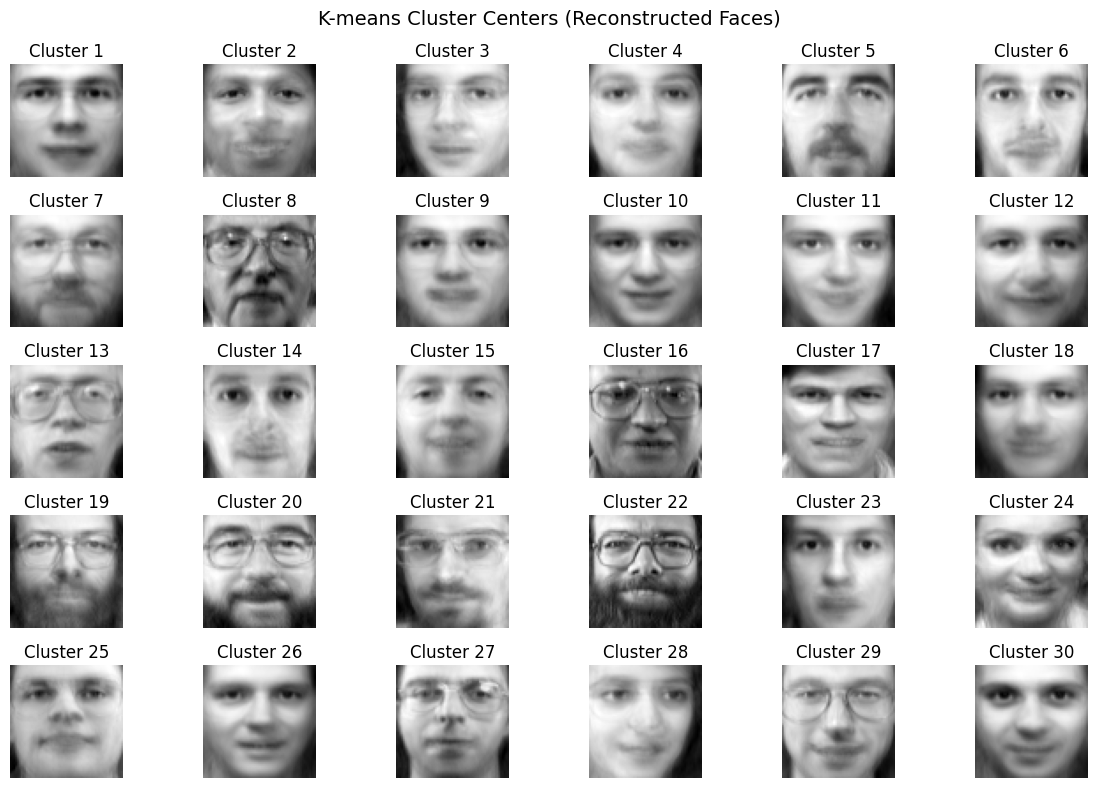

In [7]:
import matplotlib.pyplot as plt

# Visualize K-means clusters
centroids_PCA_50  = kmeans_initial.cluster_centers_
centroids_original_space_50 = pca_50.inverse_transform(centroids_PCA_50)

fig, axes = plt.subplots(5, 6, figsize=(12, 8))
axes = axes.flatten()

for i in range(30):
    axes[i].imshow(centroids_original_space_50[i].reshape(64, 64), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Cluster {i+1}")

plt.suptitle("K-means Cluster Centers (Reconstructed Faces)", fontsize=14)
plt.tight_layout()
plt.show()

### 4. Parameter Tuning

We already see some points over here that we can adjust:

1. PCA Dimensionality (`n_components`)
→ This controls how much information we retain from the original high-dimensional data, like the faces dataset that we are doing. If the number of components is too low, we may lose important patterns. If it's too high, we may include noise and hurt clustering performance.

2. K-Means: Number of clusters (`n_clusters`)
→ The initial value of 30 clusters may not be optimal. If the number is too low, distinct groups may be merged. If it's too high, similar points may be unnecessarily split. Tuning this value helps better match the true structure of the data, especially if the dataset contains more subtle variations.

3. DBSCAN: Epsilon (`eps`) and Minimum Samples (`min_samples`)
→ These parameters directly control how DBSCAN defines dense regions to form clusters. If `eps` is too small, many points may be labeled as noise; if too large, distinct clusters may be merged. Similarly, `min_samples` affects how strict the algorithm is when forming a core point.

Fortunately, the dataset has some ground values, so we can determine how many clusters that we are going to use on the K-means Clustering. Hence, we do not need to tune it further away.

In [8]:
Y = dataset.target
print(Y)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

In [9]:
unique_labels = np.unique(Y)
print("Unique labels in Y is ", unique_labels)
print("Number of unique labels in Y is ", len(unique_labels))

Unique labels in Y is  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Number of unique labels in Y is  40


It can be seen clearly that the number of unique labels in the dataset is 40, where for each labels they had 10 different photos inside the dataset. Therefore, it will be better for us to try 40 or more clusters as our cluster number for the `K-Means Clustering` later. I will use some of these domain knowledges for the evaluation only in the end, where `ARI (Adjusted Rand Score)` and `NMI (Normalized Mutual Info) score` will be helping

In [10]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, normalized_mutual_info_score
from tqdm import tqdm

y = dataset.target # Labels which we will not use for the clustering, but we will use for evalaution in the end only.

dims_value = [10, 20, 30, 40, 50, 60, 70, 80]
k_values = [40, 45, 50, 55, 60]

results = []

for d in tqdm(dims_value, desc="PCA dimensions"):
    pca = PCA(n_components=d, random_state=42)
    X_pca = pca.fit_transform(X)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_pca)

        try:
            silhouette = silhouette_score(X_pca, labels)
        except:
            silhouette = -1

        try:
            dbi = davies_bouldin_score(X_pca, labels)
        except:
            dbi = float('inf')

        try:
            ari = adjusted_rand_score(y, labels)
            nmi = normalized_mutual_info_score(y, labels)
        except:
            ari, nmi = -1, -1

        results.append({
            "PCA_Dim": d,
            "K": k,
            "Silhouette": silhouette,
            "Davies-Bouldin": dbi,
            "ARI": ari,
            "NMI": nmi
        })

# Convert to DataFrame and sort by Silhouette
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by= "Silhouette", ascending=False)
df_results_1 = df_results.sort_values(by= "Davies-Bouldin", ascending=True)
df_results_2 = df_results.sort_values(by= "ARI", ascending=False)
df_results_3 = df_results.sort_values(by= "NMI", ascending=False)

# Show top 10 results 
print(df_results.head(10))
print(df_results_1.head(10))
print(df_results_2.head(10))
print(df_results_3.head(10))


PCA dimensions: 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]

    PCA_Dim   K  Silhouette  Davies-Bouldin       ARI       NMI
4        10  60    0.286998        1.082623  0.400279  0.785164
3        10  55    0.280144        1.118269  0.402274  0.774996
9        20  60    0.277426        1.171321  0.514400  0.824261
8        20  55    0.263321        1.242048  0.517244  0.817378
14       30  60    0.261864        1.244414  0.497959  0.816639
2        10  50    0.258743        1.181048  0.408532  0.767288
7        20  50    0.257238        1.248750  0.511042  0.814568
19       40  60    0.257228        1.293839  0.512235  0.822867
1        10  45    0.257098        1.215627  0.379253  0.751230
13       30  55    0.252370        1.273985  0.511072  0.816489
    PCA_Dim   K  Silhouette  Davies-Bouldin       ARI       NMI
4        10  60    0.286998        1.082623  0.400279  0.785164
3        10  55    0.280144        1.118269  0.402274  0.774996
9        20  60    0.277426        1.171321  0.514400  0.824261
2        10  50    0.258743        1.181

Since, there are some criterion that I used here, I will try to determine the top 5 combination of PCA_dim and k from the process. There is a reason why I did not use the MLE for determining the number of dimension reduction, it is because MLE is only focused on the reconstruction and the variance, it will not give you the best result on the clustering itself in the end. So, here I will do some normalization of the metrics that we have and decide which one gives the best result and we will try those top 5 on the decision of determining the best parameters for the DBSCAN also.

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Convert Davies-Bouldin to inverse (lower is better)
df_results['DB_inv'] = 1 / df_results['Davies-Bouldin'].replace(0, np.nan)

scaler = MinMaxScaler()
normalized = scaler.fit_transform(df_results[['Silhouette', 'DB_inv', 'ARI', 'NMI']])
df_norm = pd.DataFrame(normalized, columns=['Silhouette_norm', 'DB_inv_norm', 'ARI_norm', 'NMI_norm'])

df_results = pd.concat([df_results.reset_index(drop=True), df_norm], axis=1)

df_results['Weighted_Score'] = (
    0.4 * df_results['Silhouette_norm'] +
    0.2 * df_results['DB_inv_norm'] +
    0.2 * df_results['ARI_norm'] +
    0.2 * df_results['NMI_norm']
)

# Sort by final score
top5 = df_results.sort_values(by='Weighted_Score', ascending=False).head(5)

# Show top 5
print("Top 5 Best Configurations (Weighted Score)")
print(top5[['PCA_Dim', 'K', 'Silhouette', 'Davies-Bouldin', 'ARI', 'NMI', 'Weighted_Score']])


Top 5 Best Configurations (Weighted Score)
   PCA_Dim   K  Silhouette  Davies-Bouldin       ARI       NMI  Weighted_Score
2       20  60    0.277426        1.171321  0.514400  0.824261        0.910096
3       20  55    0.263321        1.242048  0.517244  0.817378        0.809687
4       30  60    0.261864        1.244414  0.497959  0.816639        0.776613
7       40  60    0.257228        1.293839  0.512235  0.822867        0.769896
6       20  50    0.257238        1.248750  0.511042  0.814568        0.769137


Okay, from the configurations that we have, it is seen clearly that when the dimension is equal to 20, it gives a higher silhoutte score and also the weighted score, hereby lastly for the DBSCAN, I will utilize dimension equal to 20, and try to see the result from the silhoutte score directly.

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

pca = PCA(n_components=20, random_state=42)
X_pca = pca.fit_transform(X)

eps_value = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
min_samples_value = [3, 5, 7, 9, 11]

result_dbscan = []

for eps in eps_value:
    for min_s in min_samples_value:
        model = DBSCAN(eps=eps, min_samples=min_s)
        labels = model.fit_predict(X_pca)
        
        if len(set(labels)) <= 1 or len(set(labels)) == len(labels):
            continue

        try:
            sil = silhouette_score(X_pca, labels)
        except:
            sil = -1
            
        result_dbscan.append({
            "PCA_Dim": 20,
            "Eps": eps,
            "Min_Samples": min_s,
            "Silhouette": sil,
        })
        
        
df_dbscan = pd.DataFrame(result_dbscan)
df_dbscan = df_dbscan.sort_values(by="Silhouette", ascending=False)
print(df_dbscan.head(10))

    PCA_Dim  Eps  Min_Samples  Silhouette
11       20  4.0            3    0.197445
19       20  4.5           11    0.183657
14       20  4.0            9    0.173856
10       20  3.5            9    0.164566
0        20  1.5            3    0.150414
15       20  4.5            3    0.146083
7        20  3.5            3    0.129195
33       20  6.0            9    0.090601
34       20  6.0           11    0.090120
20       20  5.0            3    0.054843


So, we will end up with these parameters after some adjusting and tuning
1. PCA_dimension = 20
2. Number of CLusters for K-Means Clustering = 60
3. Epsilon = 4 and min_samples = 3 for DBSCAN

Now, let's draw some pictures on it and do some analysis afterwards

In [20]:
# Final best configuration
pca_dim = 20
k = 60
eps = 4
min_samples = 3

# Apply PCA (20D)
pca_finale = PCA(n_components=pca_dim, random_state=42)
X_pca_finale = pca_finale.fit_transform(X)

# KMeans clustering
kmeans_finale = KMeans(n_clusters=k, random_state=42)
kmeans_labels_finale = kmeans_finale.fit_predict(X_pca_finale)

# DBSCAN clustering
dbscan_finale = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels_finale = dbscan_finale.fit_predict(X_pca_finale)

# Evaluation function
def evaluate(name, labels):
    print(f"\n📊 {name} Evaluation")
    print(f"Silhouette Score       : {silhouette_score(X_pca_finale, labels):.4f}")
    print(f"Davies-Bouldin Index   : {davies_bouldin_score(X_pca_finale, labels):.4f}")
    print(f"Adjusted Rand Index    : {adjusted_rand_score(y, labels):.4f}")
    print(f"Normalized Mutual Info : {normalized_mutual_info_score(y, labels):.4f}")

# Evaluate both clustering results
evaluate("KMeans", kmeans_labels_finale)
evaluate("DBSCAN", dbscan_labels_finale)


📊 KMeans Evaluation
Silhouette Score       : 0.2774
Davies-Bouldin Index   : 1.1713
Adjusted Rand Index    : 0.5144
Normalized Mutual Info : 0.8243

📊 DBSCAN Evaluation
Silhouette Score       : 0.1974
Davies-Bouldin Index   : 1.5139
Adjusted Rand Index    : 0.2537
Normalized Mutual Info : 0.7919


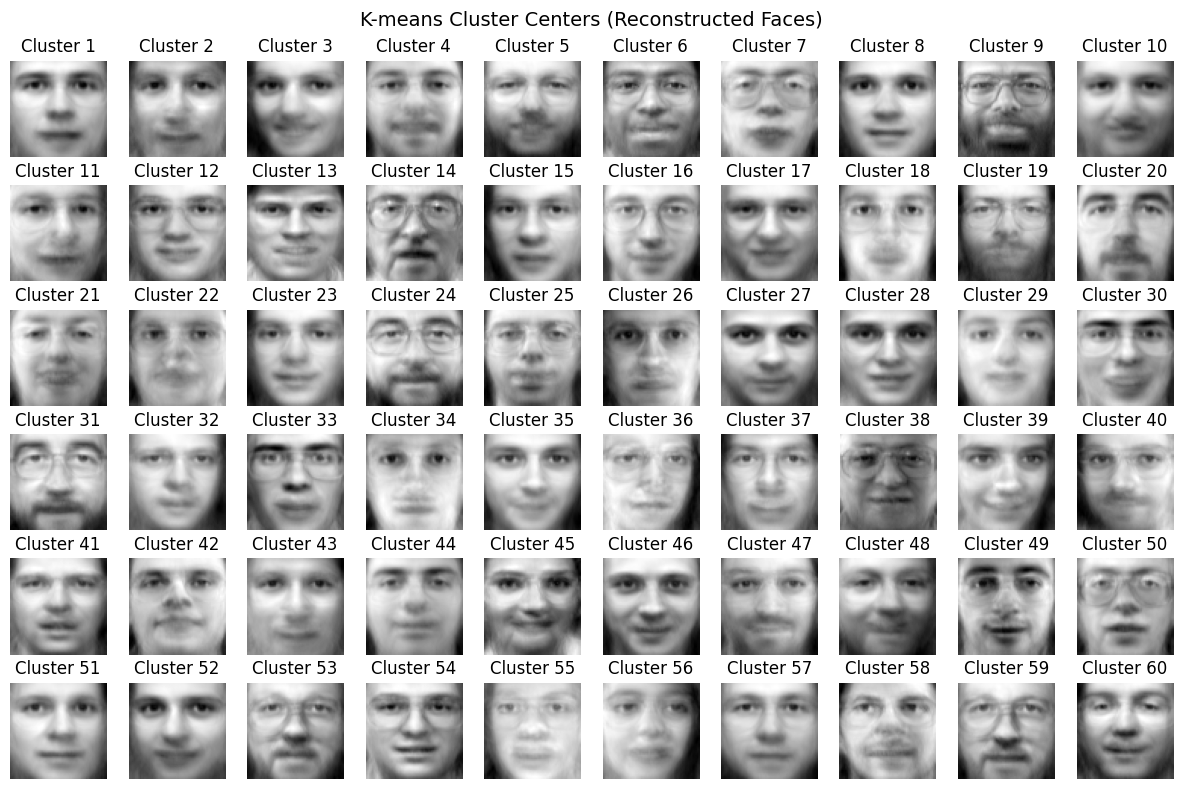

In [18]:
import matplotlib.pyplot as plt

# Visualize K-means clusters
centroids_PCA_20 = kmeans_finale.cluster_centers_
centroids_original_space_20 = pca_finale.inverse_transform(centroids_PCA_20)

fig, axes = plt.subplots(6, 10, figsize=(12, 8))
axes = axes.flatten()

for i in range(60):
    axes[i].imshow(centroids_original_space_20[i].reshape(64, 64), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Cluster {i+1}")

plt.suptitle("K-means Cluster Centers (Reconstructed Faces)", fontsize=14)
plt.tight_layout()
plt.show()

### 5. Conclusion

From the results that we have achieved, several insights can be drawn regarding the clustering performance on the Olivetti Faces dataset.

1. PCA Dimensionality

    Reducing the dimensionality of the data using PCA proved to be an essential step before clustering. Through experimentation, we found that a dimensionality of 20 strikes the best balance between retaining enough facial information and allowing the clustering algorithm to operate effectively in a reduced space. Lower dimensions help remove noise, while higher dimensions can make clustering less efficient due to the curse of dimensionality.

2. Number of Clusters (KMeans)

    Interestingly, the best results were not achieved when the number of clusters was set to the number of unique individuals (40), but rather when using 60 clusters. This suggests that KMeans captures subgroups or intra-person variations (such as different expressions or lighting conditions) that are present in the dataset, making clustering finer and more accurate in terms of geometry and separation.

3. DBSCAN Parameters: Epsilon and Min Samples

    DBSCAN requires careful tuning of epsilon and min_samples. In our experiments, we found that epsilon = 4 and min_samples = 3 provided the best results. However, even at its best, DBSCAN performed worse than KMeans across all evaluation metrics. This is due to the structure of the dataset, where points are densely packed and evenly distributed, making it hard for DBSCAN to form well-defined clusters without over-labeling noise or merging clusters.

4. Importance of Multiple Evaluation Metrics

    Evaluating clustering performance using only one metric (e.g., Silhouette Score) can be misleading. Therefore, we used a combination of internal and external metrics: Silhouette Score, Davies-Bouldin Index, Adjusted Rand Index (ARI), and Normalized Mutual Information (NMI). This multi-metric approach gives a more robust understanding of the clustering performance, balancing both geometric separation and alignment with true labels that area luckily given on the datasets, but remember that we can not use that label for the unsupervised learning training, it is only for the evaluation in the end.

5. DBSCAN vs. KMeans on Face Data

    Based on the overall scores and visualizations, KMeans clearly outperformed DBSCAN on this facial dataset. DBSCAN struggled with the uniform distribution of samples and the lack of naturally dense clusters. KMeans, on the other hand, benefited from the relatively balanced dataset and the Euclidean nature of PCA-reduced features, making it a more suitable choice for this type of data.

That will be the end of this notebook, hope you enjoy and gain something new from this notebook. Thank You everyone.